In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import LabelEncoder

# Data Pre-processing

In [2]:
data_train = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
data_test = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

In [3]:
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
print("Size: " + str(data_train.size))
print("Shape: " + str(data_train.shape))
print("-----------------------")
print(data_train.value_counts('attack_cat'))
print("-----------------------")
print(data_train.value_counts('label'))

Size: 7890345
Shape: (175341, 45)
-----------------------
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64
-----------------------
label
1    119341
0     56000
Name: count, dtype: int64


In [6]:
# Handle missing value and duplicate if any
data_train.dropna(inplace=True)
data_train.drop_duplicates(inplace=True)

data_test.dropna(inplace=True)
data_test.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Label Distribution')

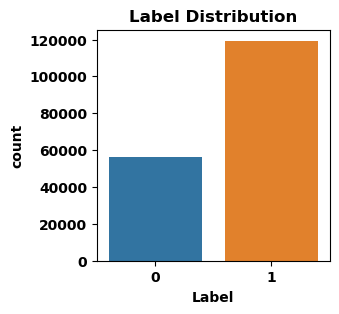

In [7]:
#Attack and Normal distribution
plt.figure(figsize=(3, 3))
sns.countplot(data=data_train, x="label")
plt.xlabel("Label")
plt.title("Label Distribution")

Text(0.5, 1.0, 'Attack Category Distribution')

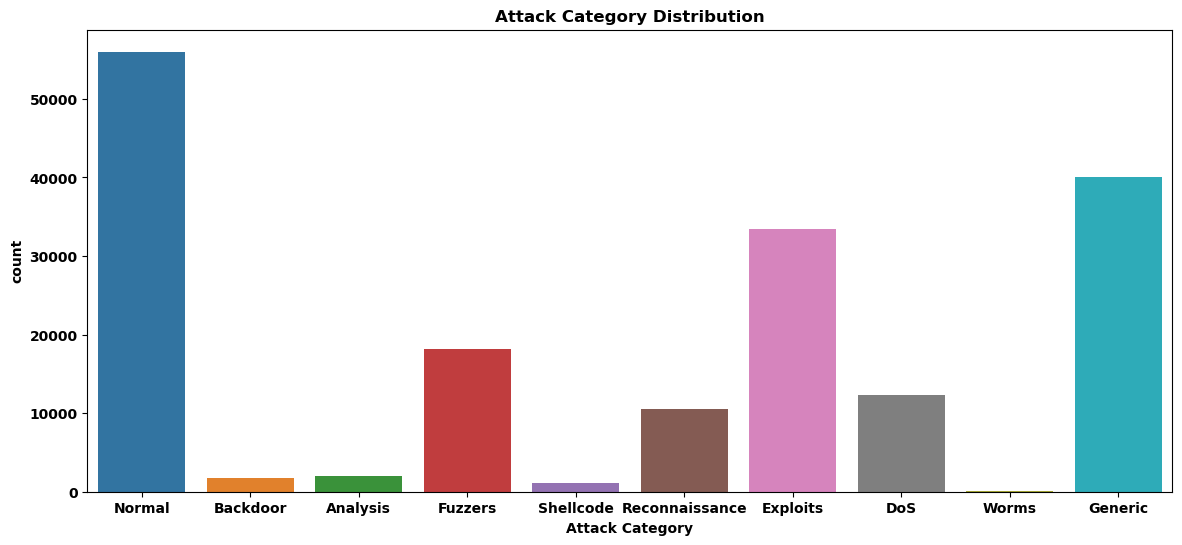

In [8]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

In [9]:
#All_feature
all_feature = data_train.columns
all_feature

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [10]:
#Split Attack and Normal from dataframe
data_train_attack = data_train[data_train['label'] == 1]
data_test_attack = data_test[data_test['label'] == 1]

#Optional
#data_train_normal = data_train[data_train['label'] == 0]
#data_test_normal = data_test[data_test['label'] == 0]

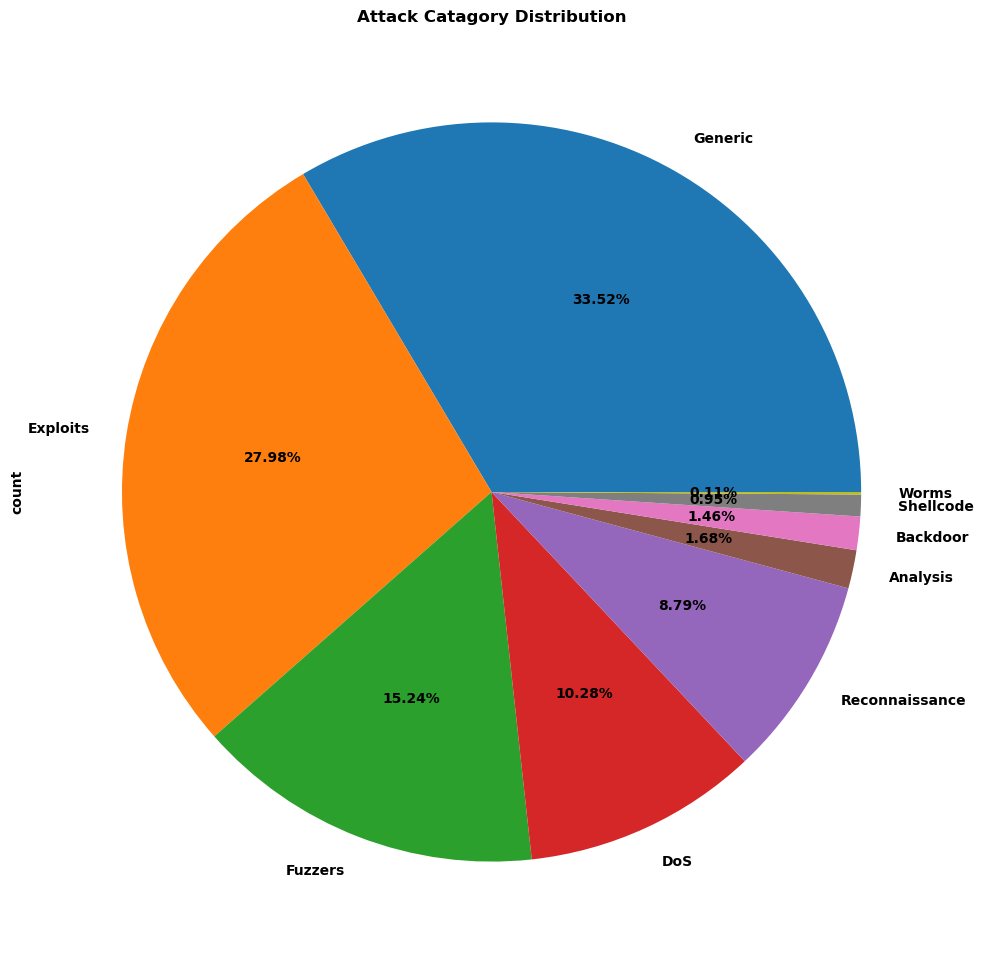

In [11]:
#Attack Category Distribution
plt.figure(figsize=(12, 12))
data_train_attack['attack_cat'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Catagory Distribution")
plt.show()

Text(0.5, 1.0, 'Attack Category Distribution')

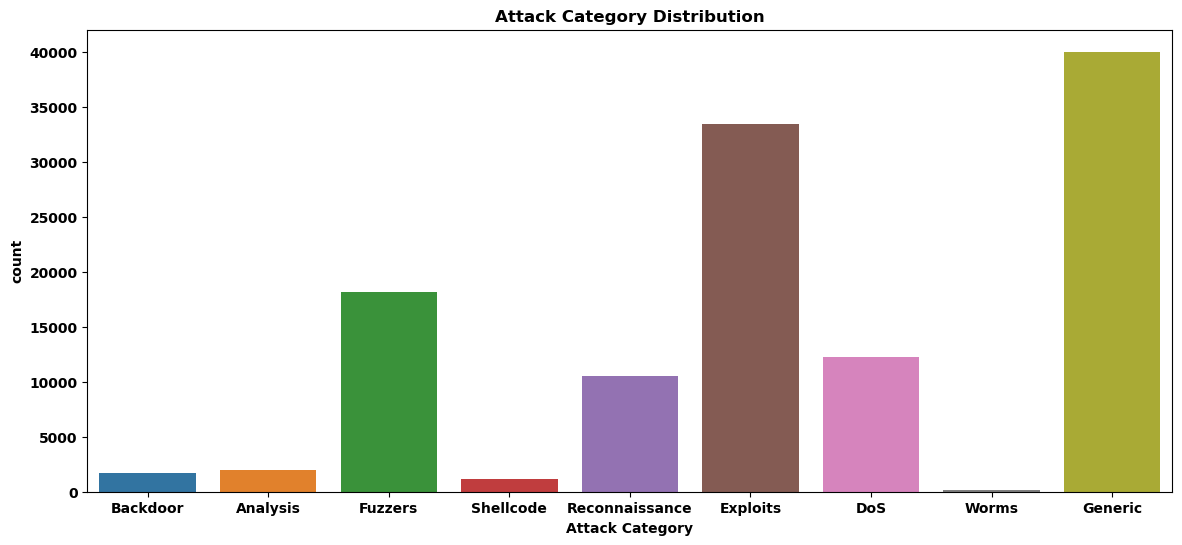

In [12]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Encode Train Data

In [13]:
#Encode attack_cat
le = LabelEncoder()
data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])

#Encode state
data_train_attack['state'] = le.fit_transform(data_train_attack['state'])

#Encode service
data_train_attack['service'] = le.fit_transform(data_train_attack['service'])

#Encode proto
data_train_attack['proto'] = le.fit_transform(data_train_attack['proto'])

data_train_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_22920\2731351650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_22920\2731351650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['state'] = le.fit_transform(data_train_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_22920\2731351650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

## Encode Test Data

In [14]:
#Encode attack_cat
data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])

#Encode state
data_test_attack['state'] = le.fit_transform(data_test_attack['state'])

#Encode service
data_test_attack['service'] = le.fit_transform(data_test_attack['service'])

#Encode proto
data_test_attack['proto'] = le.fit_transform(data_test_attack['proto'])

data_test_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_22920\230897011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_22920\230897011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['state'] = le.fit_transform(data_test_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_22920\230897011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

Text(0.5, 1.0, 'Attack Category Distribution')

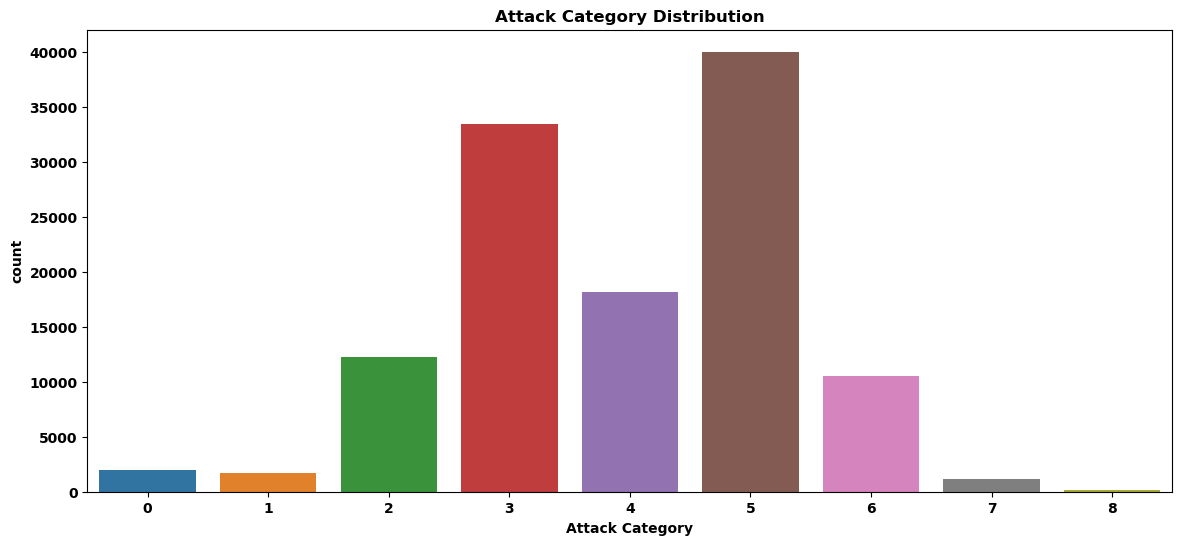

In [15]:
#After Attack Category Encoding
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Normalization

In [16]:
# Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_norm = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 
                'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 
                'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 
                'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 
                'ct_srv_dst', 'is_sm_ips_ports']

data_train_attack[cols_to_norm] = scaler.fit_transform(data_train_attack[cols_to_norm])
data_test_attack[cols_to_norm] = scaler.fit_transform(data_test_attack[cols_to_norm])

C:\Users\Acer\AppData\Local\Temp\ipykernel_22920\1185179857.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack[cols_to_norm] = scaler.fit_transform(data_train_attack[cols_to_norm])
C:\Users\Acer\AppData\Local\Temp\ipykernel_22920\1185179857.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack[cols_to_norm] = scaler.fit_transform(data_test_attack[cols_to_norm])


## Feature Selection

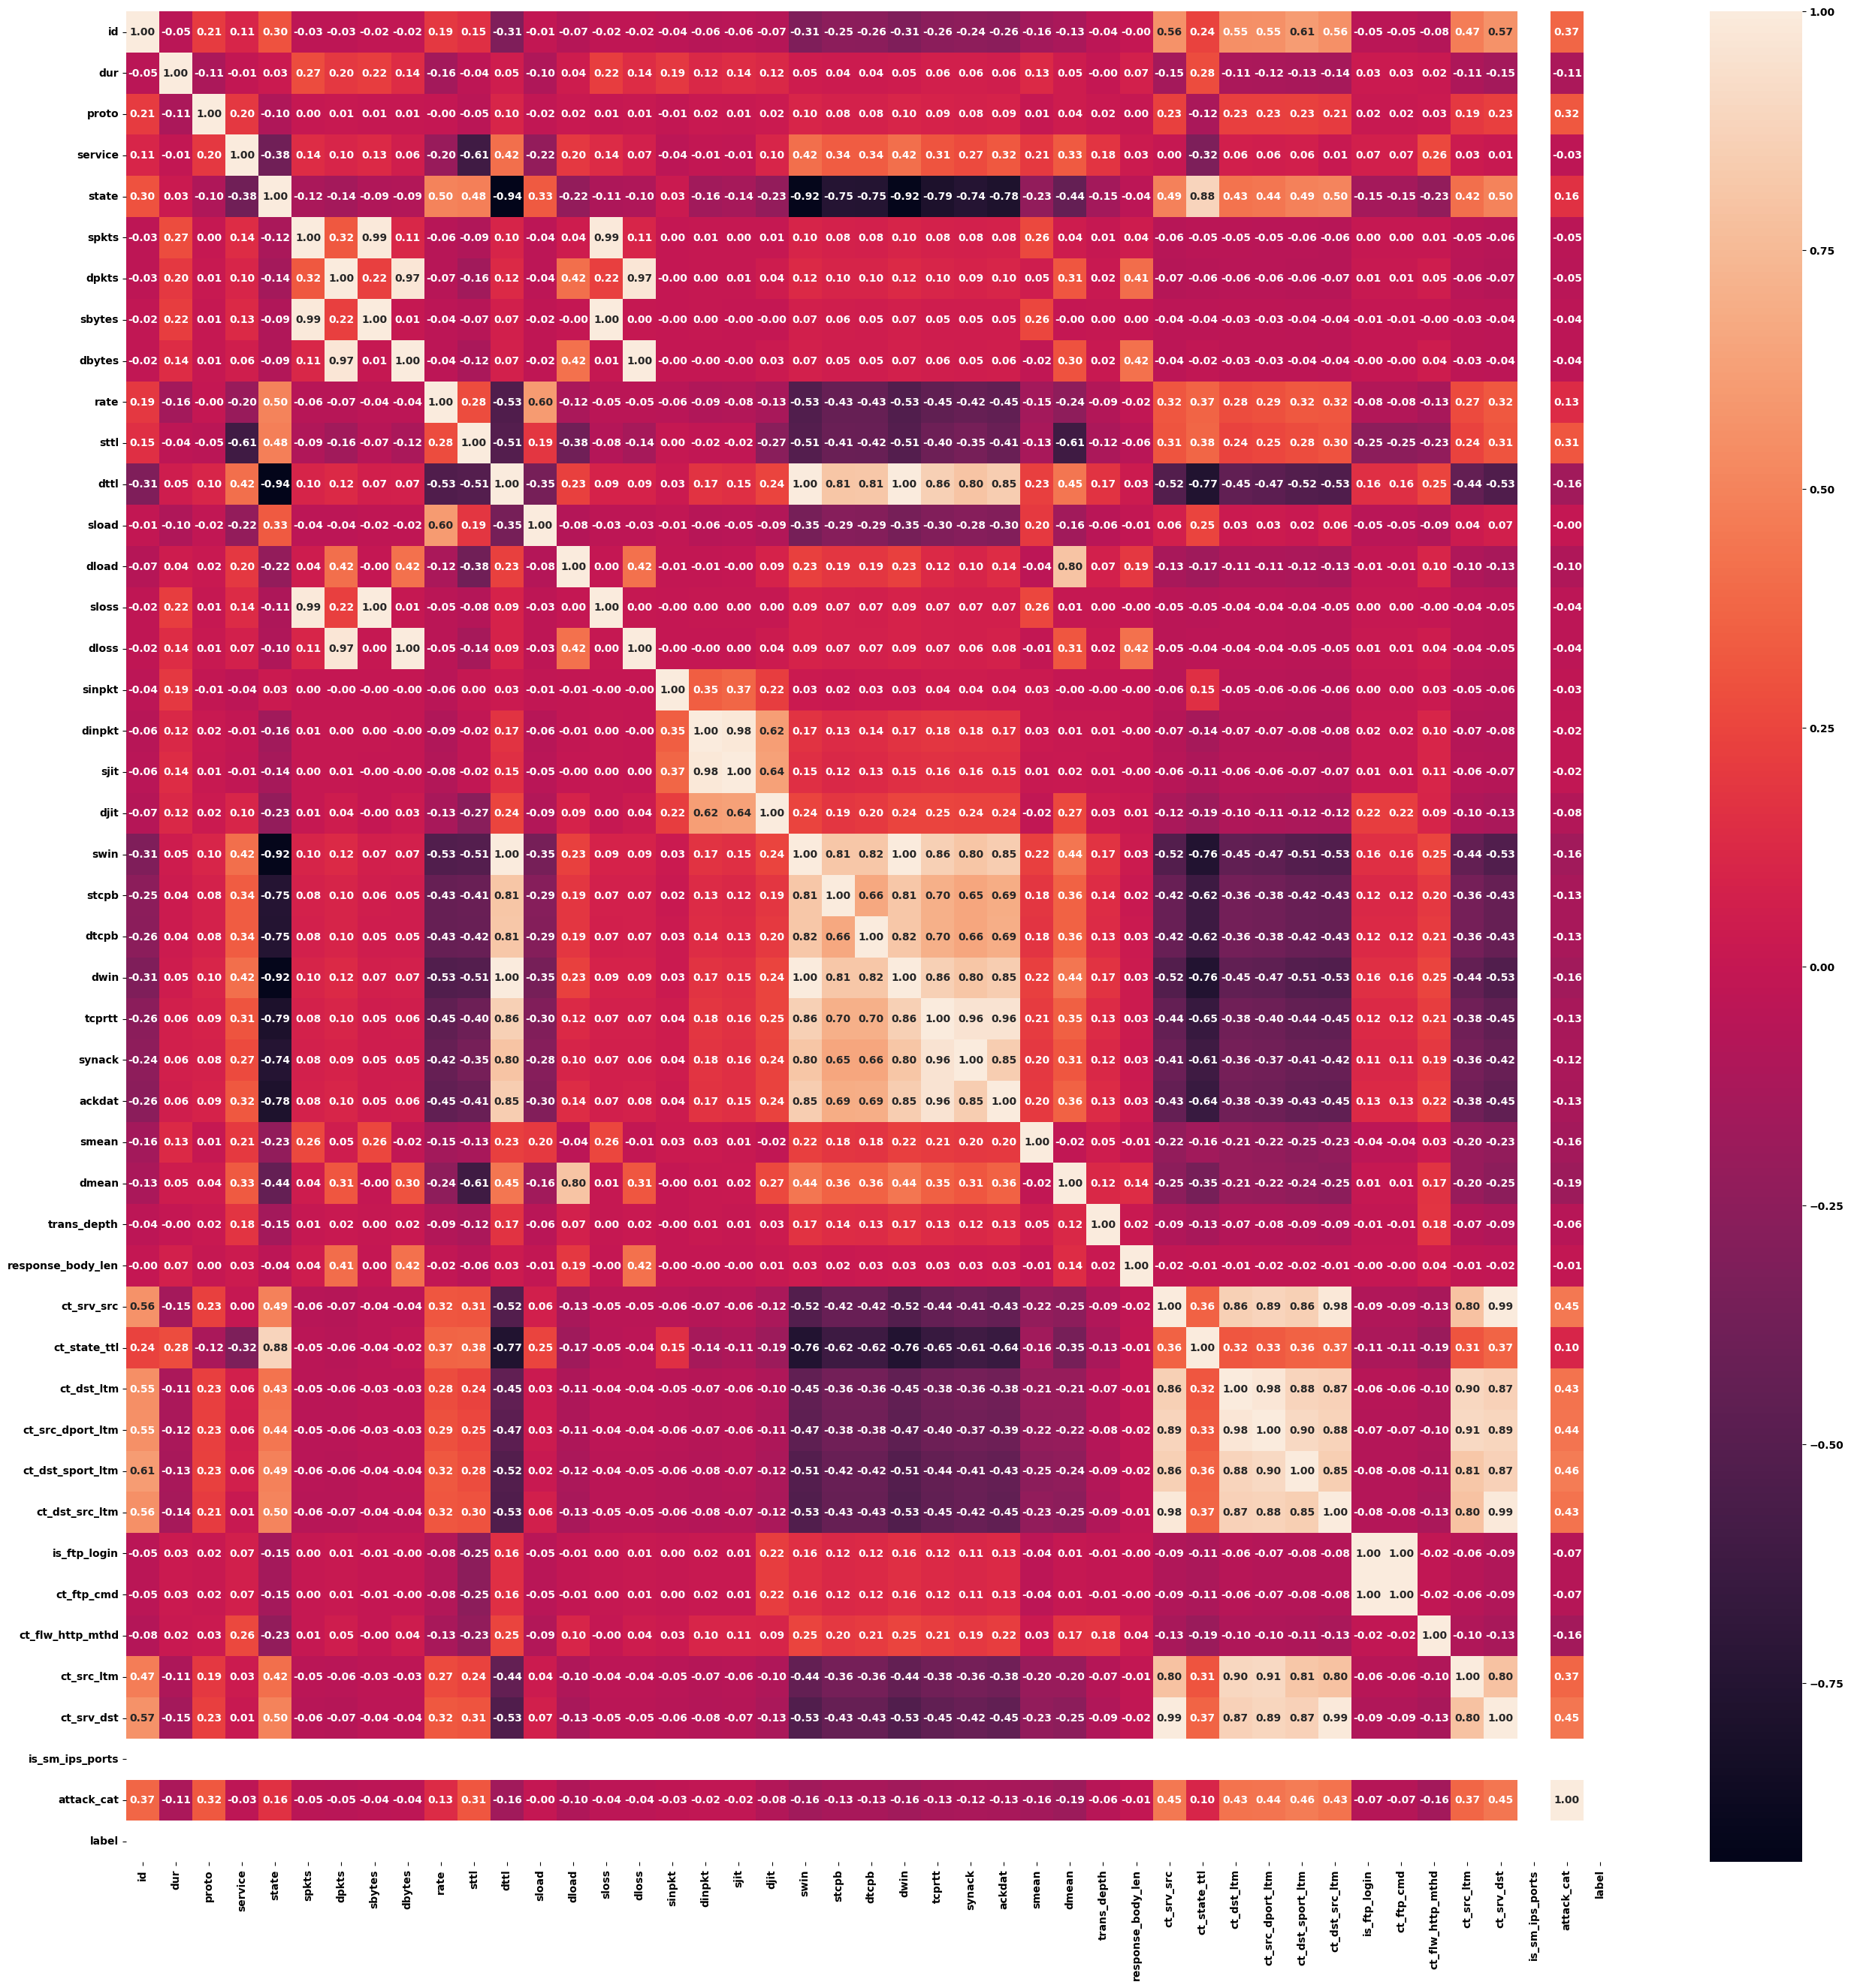

In [17]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(data_train_attack.corr(), annot=True, fmt=".2f")
plt.show()

In [18]:
#Feature Selection
feature = data_train_attack.drop(['id', 'dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'label'], axis=1)
feature.dtypes

dur                  float64
proto                  int32
service                int32
state                  int32
spkts                float64
dpkts                float64
sbytes               float64
dbytes               float64
rate                 float64
sttl                 float64
dttl                 float64
sload                float64
dload                float64
sloss                float64
dloss                float64
sinpkt               float64
sjit                 float64
djit                 float64
swin                 float64
stcpb                float64
dtcpb                float64
dwin                 float64
tcprtt               float64
synack               float64
ackdat               float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
ct_srv_src           float64
ct_state_ttl         float64
ct_dst_ltm           float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
is_ftp_login  

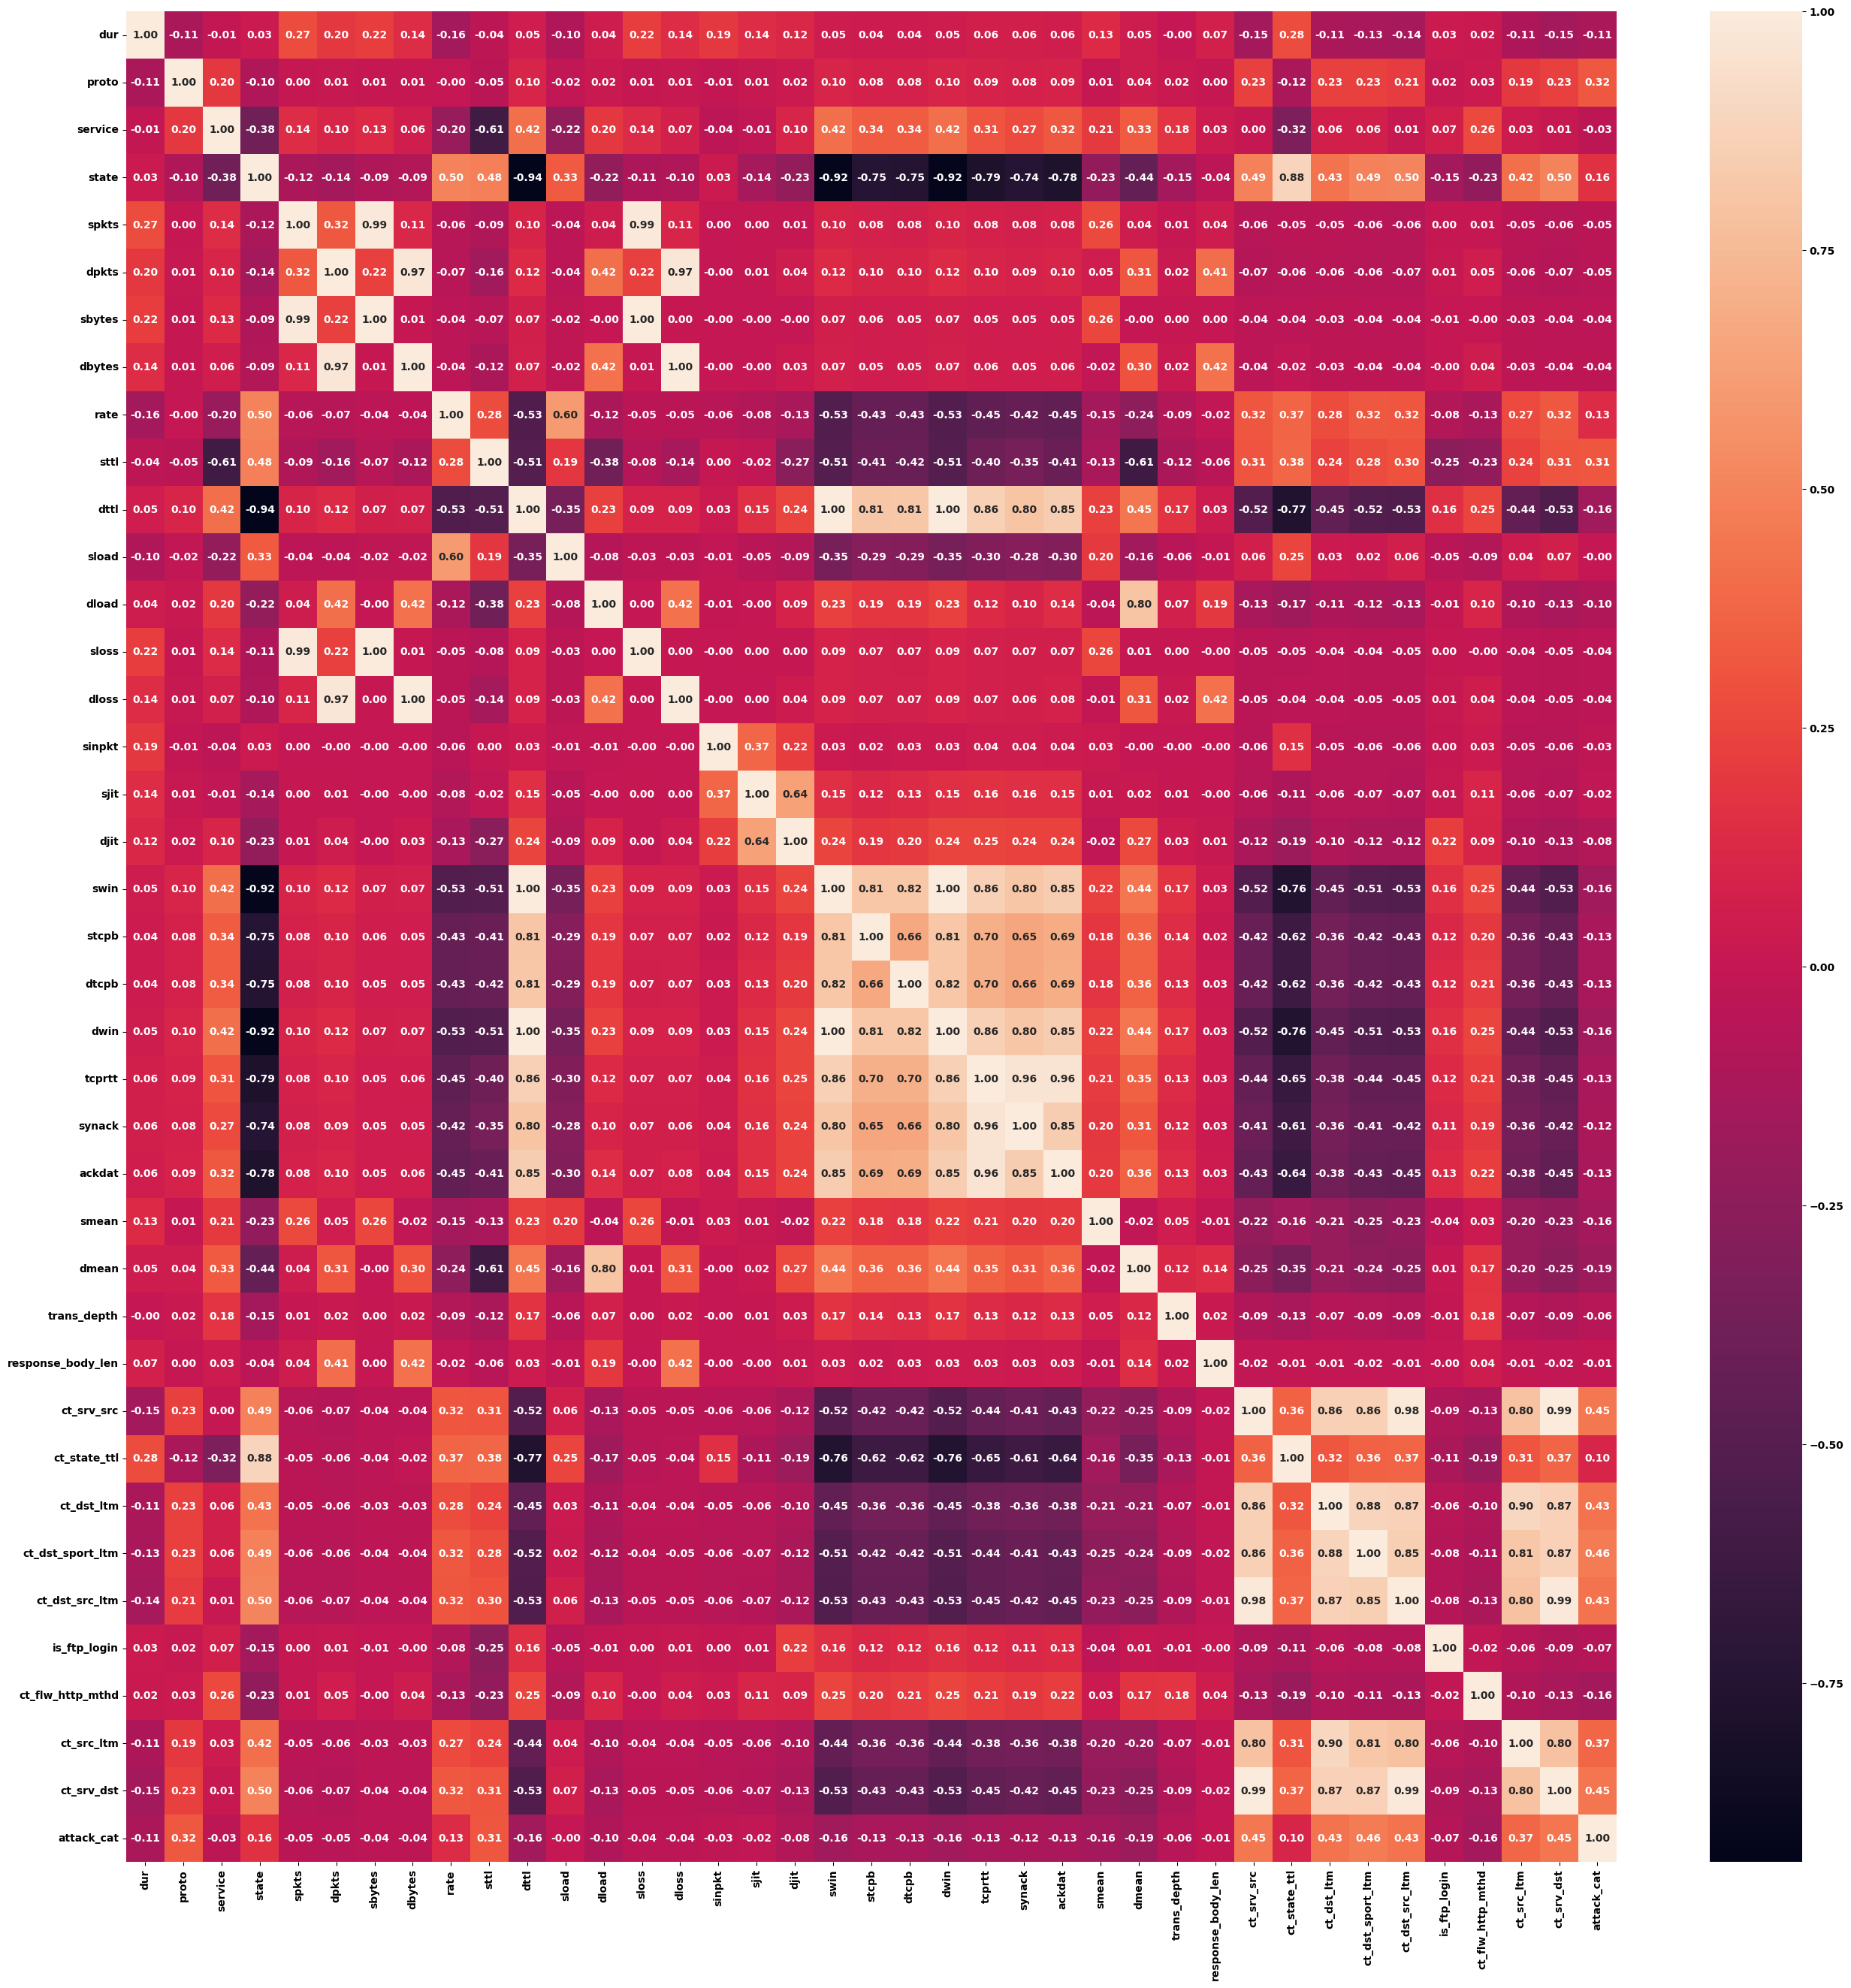

In [19]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(feature.corr(), annot=True, fmt=".2f")
plt.show()

# Balancing Data

In [20]:
#Splitting the dataset into dependent and independent feature
X_train = feature.drop(columns=['attack_cat'])
y_train = feature["attack_cat"]

X_test = data_test_attack.drop(columns=['attack_cat', 'id', 'dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'label'])
y_test = data_test_attack["attack_cat"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((119341, 38), (119341,), (45332, 38), (45332,))

## BorderlineSMOTE

In [21]:
borderlinesmote = BorderlineSMOTE()
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_resample(X_train, y_train)

X_borderlinesmote.shape, y_borderlinesmote.shape

((360000, 38), (360000,))

<Axes: xlabel='attack_cat', ylabel='count'>

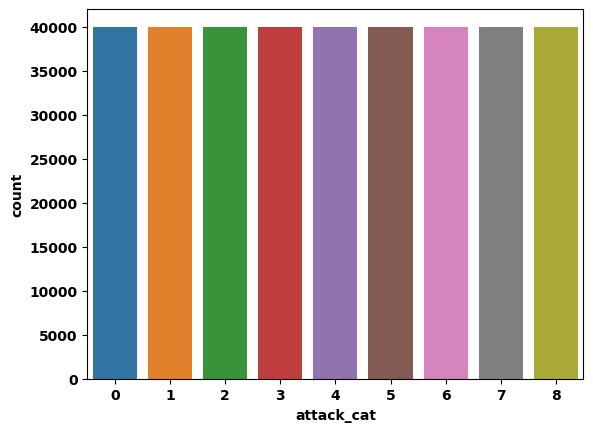

In [22]:
#Create new dataframe from X_borderlinesmote and y_borderlinesmote to count every attack
data_borderlinesmote = pd.concat([X_borderlinesmote, y_borderlinesmote], axis=1)

sns.countplot(data=data_borderlinesmote, x="attack_cat")

In [23]:
#data_stl.drop_duplicates(inplace=True)
print(data_borderlinesmote.value_counts('attack_cat'))
print("--------------------")
print("Shape: " + str(data_borderlinesmote.shape))
print("--------------------")
print("Duplicates: " + str(data_borderlinesmote.duplicated().sum()))

attack_cat
0    40000
1    40000
2    40000
3    40000
4    40000
5    40000
6    40000
7    40000
8    40000
Name: count, dtype: int64
--------------------
Shape: (360000, 39)
--------------------
Duplicates: 102454


# Model Evaluation

In [24]:
#Holder to store model performance
from sklearn import metrics
ML_Model = []
accuracy = []
precision = []
recall = []
f1_score = []


#function to storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    precision.append(round(b, 5))
    recall.append(round(c, 5))
    f1_score.append(round(d, 5))

In [25]:
#function to computing performance and computing performance using classification report, then stroing the results
def model_report(modelName, y_train, y_test, p_train, p_test):
    print("Model:{}\n".format(modelName))

    #computing accuracy score
    acc_train = metrics.accuracy_score(y_train, p_train)
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on training Data: {:.5f}".format(acc_train))
    print("Accuracy on test Data: {:.5f}\n".format(acc_test))

    #computing precision score
    precision_score_train = metrics.precision_score(y_train, p_train, average='macro')
    precision_score_test = metrics.precision_score(y_test, p_test, average='macro')
    print("Precision on training Data: {:.5f}".format(precision_score_train))
    print("Precision on test Data: {:.5f}\n".format(precision_score_test))

    #computing recall score
    recall_score_train = metrics.recall_score(y_train, p_train, average='macro')
    recall_score_test = metrics.recall_score(y_test, p_test, average='macro')
    print("Recall score on training Data: {:.5f}".format(recall_score_train))
    print("Recall score on test Data: {:.5f}\n".format(recall_score_test))

    #computing f1 score
    f1_score_train = 2 * (precision_score_train * recall_score_train) / (precision_score_train + recall_score_train)
    f1_score_test = 2 * (precision_score_test * recall_score_test) / (precision_score_test + recall_score_test)
    print("F1 score on training Data: {:.5f}".format(f1_score_train))
    print("F1 score on test Data: {:.5f}\n".format(f1_score_test))

    #computing classification report of model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing results
    storeResults(modelName, acc_test, precision_score_test, recall_score_test, f1_score_test)

## Training, Testing, Evaluation

### Decision Tree

In [62]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
destree = DecisionTreeClassifier(max_depth=12)

#fit the model
destree.fit(X_borderlinesmote, y_borderlinesmote)

DecisionTreeClassifier(max_depth=12)

In [63]:
#predicting
p_train_destree = destree.predict(X_borderlinesmote)
p_test_destree = destree.predict(X_test)

In [64]:
#call report function
model_report(str(destree), y_borderlinesmote, y_test, p_train_destree, p_test_destree)

Model:DecisionTreeClassifier(max_depth=12)

Accuracy on training Data: 0.72620
Accuracy on test Data: 0.40285

Precision on training Data: 0.79267
Precision on test Data: 0.28713

Recall score on training Data: 0.72620
Recall score on test Data: 0.29963

F1 score on training Data: 0.75798
F1 score on test Data: 0.29324

Classification Report
              precision    recall  f1-score   support

           0       0.07      0.08      0.07       677
           1       0.03      0.04      0.04       583
           2       0.25      0.14      0.18      4089
           3       0.73      0.55      0.63     11132
           4       0.40      0.60      0.48      6062
           5       0.99      0.38      0.55     18871
           6       0.03      0.10      0.04      3496
           7       0.05      0.62      0.09       378
           8       0.03      0.18      0.05        44

    accuracy                           0.40     45332
   macro avg       0.29      0.30      0.24     45332
weight

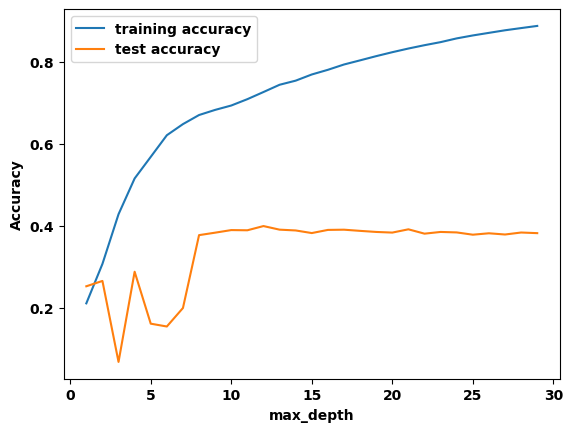

In [29]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try max_depth from 1 to 30
depth = range(1, 30)
for n in depth:
    destree_test = DecisionTreeClassifier(max_depth=n)

    destree_test.fit(X_borderlinesmote, y_borderlinesmote)
    #record training set accuracy
    training_accuracy.append(destree_test.score(X_borderlinesmote, y_borderlinesmote))
    #recor generalization accuracy
    test_accuracy.append(destree_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [65]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
ranfor = RandomForestClassifier(n_estimators=15)

#fit the model
ranfor.fit(X_borderlinesmote, y_borderlinesmote)

RandomForestClassifier(n_estimators=15)

In [66]:
#predicting
p_train_ranfor = ranfor.predict(X_borderlinesmote)
p_test_ranfor = ranfor.predict(X_test)

In [67]:
#call report function
model_report(str(ranfor), y_borderlinesmote, y_test, p_train_ranfor, p_test_ranfor)

Model:RandomForestClassifier(n_estimators=15)

Accuracy on training Data: 0.90651
Accuracy on test Data: 0.46343

Precision on training Data: 0.92957
Precision on test Data: 0.32124

Recall score on training Data: 0.90651
Recall score on test Data: 0.36432

F1 score on training Data: 0.91790
F1 score on test Data: 0.34143

Classification Report
              precision    recall  f1-score   support

           0       0.05      0.23      0.09       677
           1       0.06      0.35      0.11       583
           2       0.29      0.11      0.16      4089
           3       0.45      0.61      0.52     11132
           4       0.40      0.67      0.50      6062
           5       1.00      0.47      0.64     18871
           6       0.35      0.06      0.11      3496
           7       0.07      0.57      0.13       378
           8       0.21      0.20      0.21        44

    accuracy                           0.46     45332
   macro avg       0.32      0.36      0.27     45332
wei

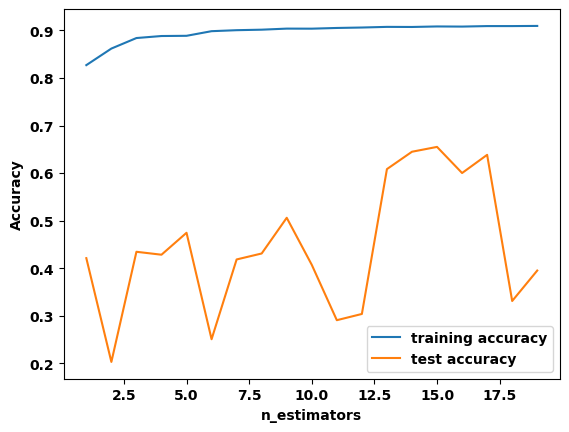

In [33]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try n_estimators from 1 to 20
n_est = range(1, 20)
for n in n_est:
    ranfor_test = RandomForestClassifier(n_estimators=n)

    ranfor_test.fit(X_borderlinesmote, y_borderlinesmote)
    #record training set accuracy
    training_accuracy.append(ranfor_test.score(X_borderlinesmote, y_borderlinesmote))
    #recor generalization accuracy
    test_accuracy.append(ranfor_test.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(n_est, training_accuracy, label="training accuracy")
plt.plot(n_est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

### Gradient Boosting

In [34]:
#import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

#instantiate the model
gbc = GradientBoostingClassifier()

#fit the model
gbc.fit(X_borderlinesmote, y_borderlinesmote)

GradientBoostingClassifier()

In [35]:
#predicting
p_train_gbc = gbc.predict(X_borderlinesmote)
p_test_gbc = gbc.predict(X_test)

In [36]:
#call report function
model_report(str(gbc), y_borderlinesmote, y_test, p_train_gbc, p_test_gbc)

Model:GradientBoostingClassifier()

Accuracy on training Data: 0.75973
Accuracy on test Data: 0.25124

Precision on training Data: 0.79119
Precision on test Data: 0.37487

Recall score on training Data: 0.75973
Recall score on test Data: 0.37797

F1 score on training Data: 0.77514
F1 score on test Data: 0.37642

Classification Report
              precision    recall  f1-score   support

           0       0.01      0.29      0.02       677
           1       0.06      0.62      0.10       583
           2       0.31      0.13      0.19      4089
           3       0.78      0.52      0.62     11132
           4       0.85      0.55      0.67      6062
           5       0.93      0.04      0.08     18871
           6       0.35      0.05      0.08      3496
           7       0.06      0.64      0.12       378
           8       0.02      0.57      0.05        44

    accuracy                           0.25     45332
   macro avg       0.37      0.38      0.21     45332
weighted avg  

### XGBoost

In [37]:
#import xgboost classifier
from xgboost import XGBClassifier

#instantiate the model
xgb = XGBClassifier()

#fit the model
xgb.fit(X_borderlinesmote, y_borderlinesmote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
#predicting
p_train_xgb = xgb.predict(X_borderlinesmote)
p_test_xgb = xgb.predict(X_test)

In [39]:
#call report function
model_report(str(xgb), y_borderlinesmote, y_test, p_train_xgb, p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on training Data: 0.82051
Accuracy on test Data: 0.55667

Precision on training Data: 0.85149
Precision on test Data: 0.31260

Recall score on training Data: 0.82051
Recall score on test Data: 0.42030

F1 score on tra

# Result

## Comparison of Models

In [68]:
#creating dataframe
result = pd.DataFrame({'ML Model' : ML_Model,
                       'Accuracy' : accuracy,
                       'Precision' : precision,
                       'Recall' : recall,
                       'F1 Score' : f1_score
                       })
result

,ML Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier(max_depth=2),0.26560,0.18440,0.27052,0.21931
1,RandomForestClassifier(n_estimators=20),0.52691,0.32269,0.36122,0.34087
2,GradientBoostingClassifier(),0.25124,0.37487,0.37797,0.37642
3,"XGBClassifier(base_score=None, booster=None, c...",0.55667,0.31260,0.42030,0.35853
4,DecisionTreeClassifier(max_depth=12),0.40285,0.28713,0.29963,0.29324
5,RandomForestClassifier(n_estimators=15),0.46343,0.32124,0.36432,0.34143


In [69]:
#Sorting the dataframe on accuracy
sorted_result = result.sort_values(by=['F1 Score'], ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,Precision,Recall,F1 Score
0,GradientBoostingClassifier(),0.25124,0.37487,0.37797,0.37642
1,"XGBClassifier(base_score=None, booster=None, c...",0.55667,0.31260,0.42030,0.35853
2,RandomForestClassifier(n_estimators=15),0.46343,0.32124,0.36432,0.34143
3,RandomForestClassifier(n_estimators=20),0.52691,0.32269,0.36122,0.34087
4,DecisionTreeClassifier(max_depth=12),0.40285,0.28713,0.29963,0.29324
5,DecisionTreeClassifier(max_depth=2),0.26560,0.18440,0.27052,0.21931


## Save to csv file

In [70]:
#save result to csv file
sorted_result.to_csv('encode_borderlinesmote_unswnb15_result.csv')

## Confusion Matrix

In [43]:
# function to calculate recall from confusion matrix
def calculate_recall(confusion_matrix):
    num_class = len(confusion_matrix)
    recalls = []

    for i in range(num_class):
        true_positive = confusion_matrix[i][i]
        false_negative = sum(confusion_matrix[i]) - true_positive

        recall = true_positive / (true_positive + false_negative)
        recalls.append(recall)
    
    return recalls

In [44]:
# function to display the recall score
def display_recall(recalls):
    print('Recall Scores for each class:')
    print('Analysis:', recalls[0])
    print('Backdoor:', recalls[1])
    print('DoS:', recalls[2])
    print('Exploits:', recalls[3])
    print('Fuzzers:', recalls[4])
    print('Generic:', recalls[5])
    print('Reconnaissance:', recalls[6])
    print('Shellcode:', recalls[7])
    print('Worms:', recalls[8])

### Decision Tree

In [71]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_destree)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

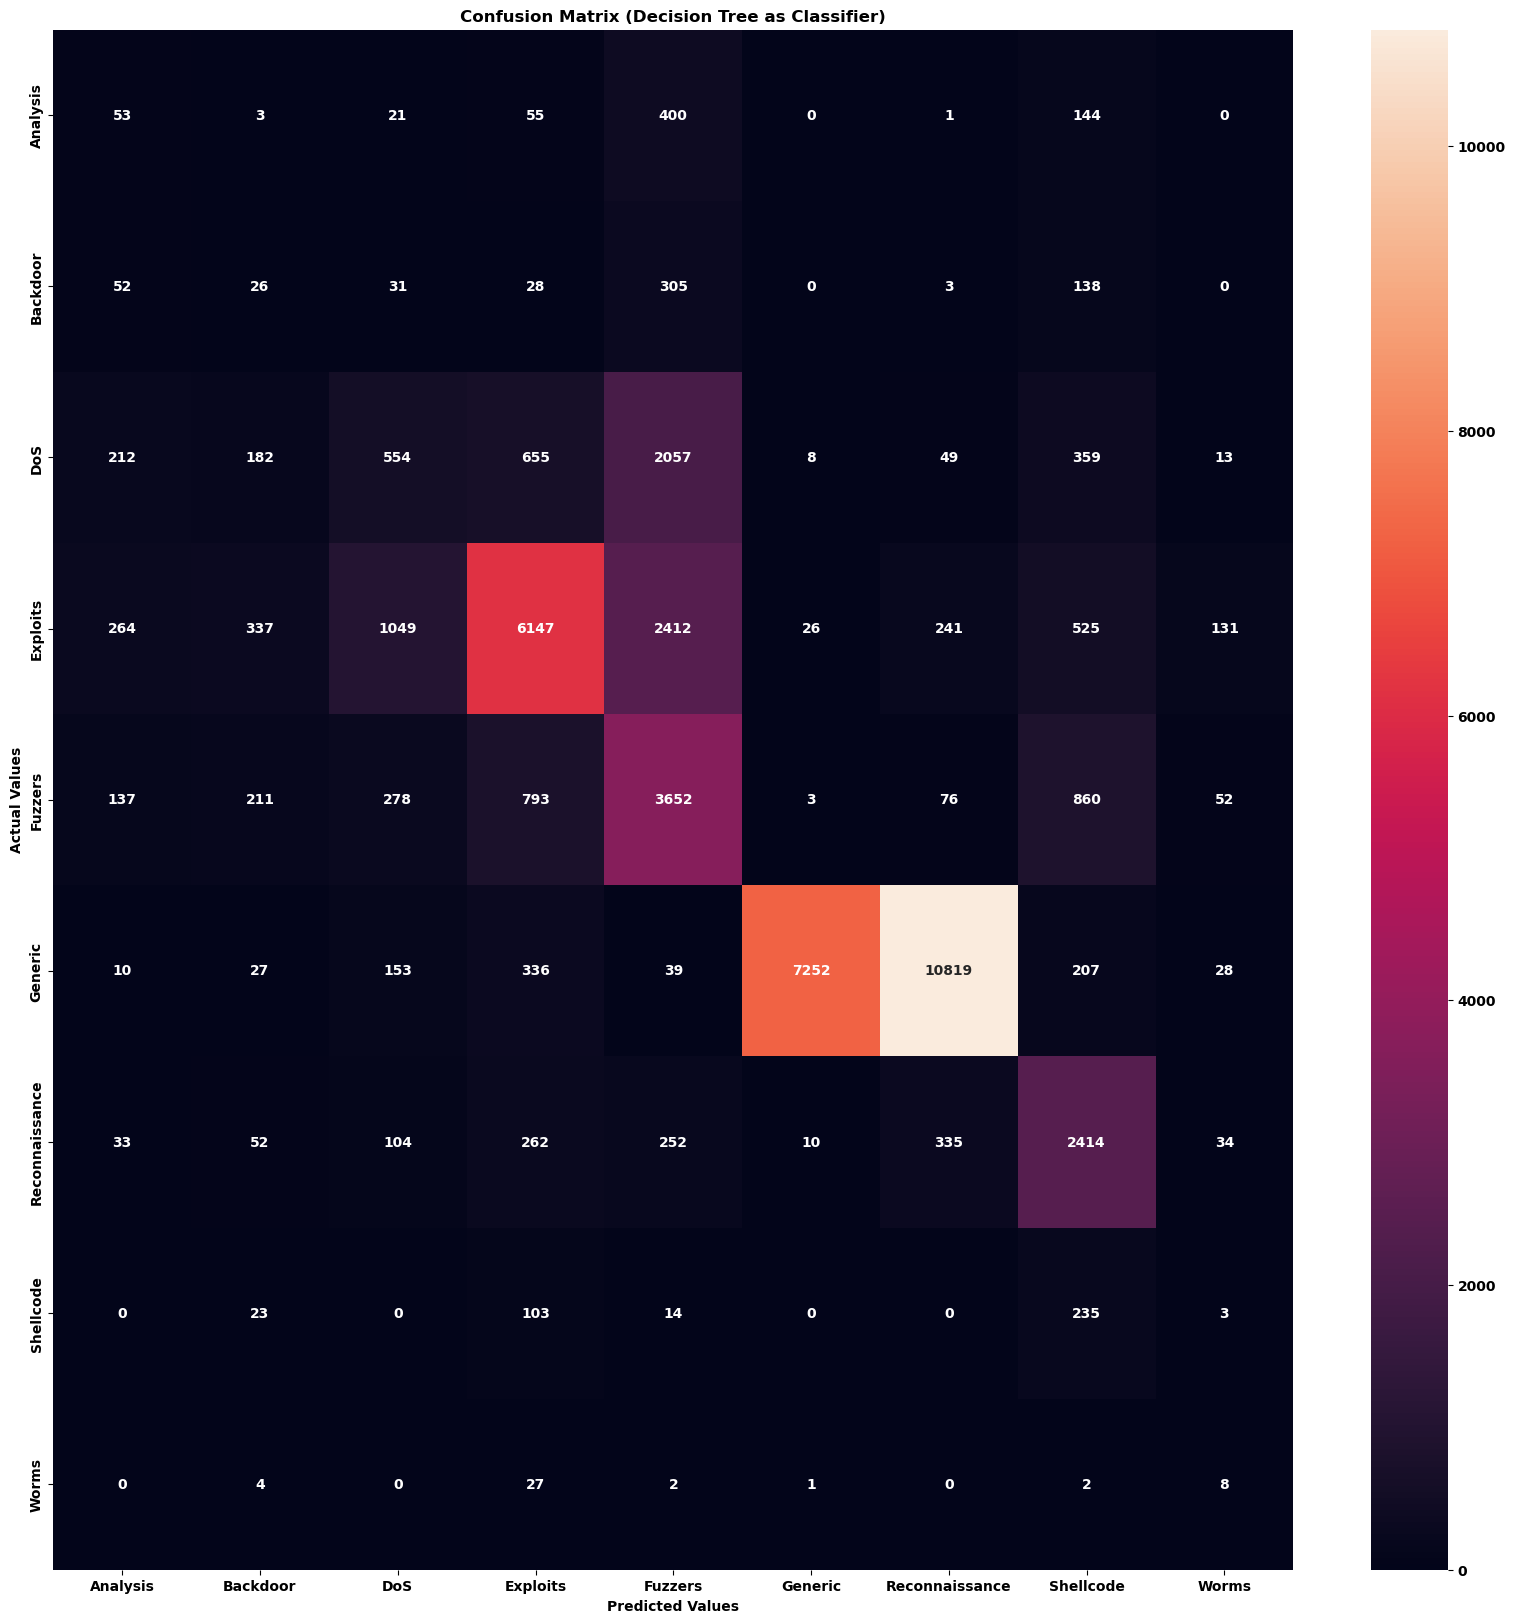

In [72]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Decision Tree as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [73]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.07828655834564253
Backdoor: 0.044596912521440824
DoS: 0.1354854487649792
Exploits: 0.5521918792669781
Fuzzers: 0.6024414384691521
Generic: 0.38429336018229027
Reconnaissance: 0.09582379862700229
Shellcode: 0.6216931216931217
Worms: 0.18181818181818182


### Random Forest

In [74]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_ranfor)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

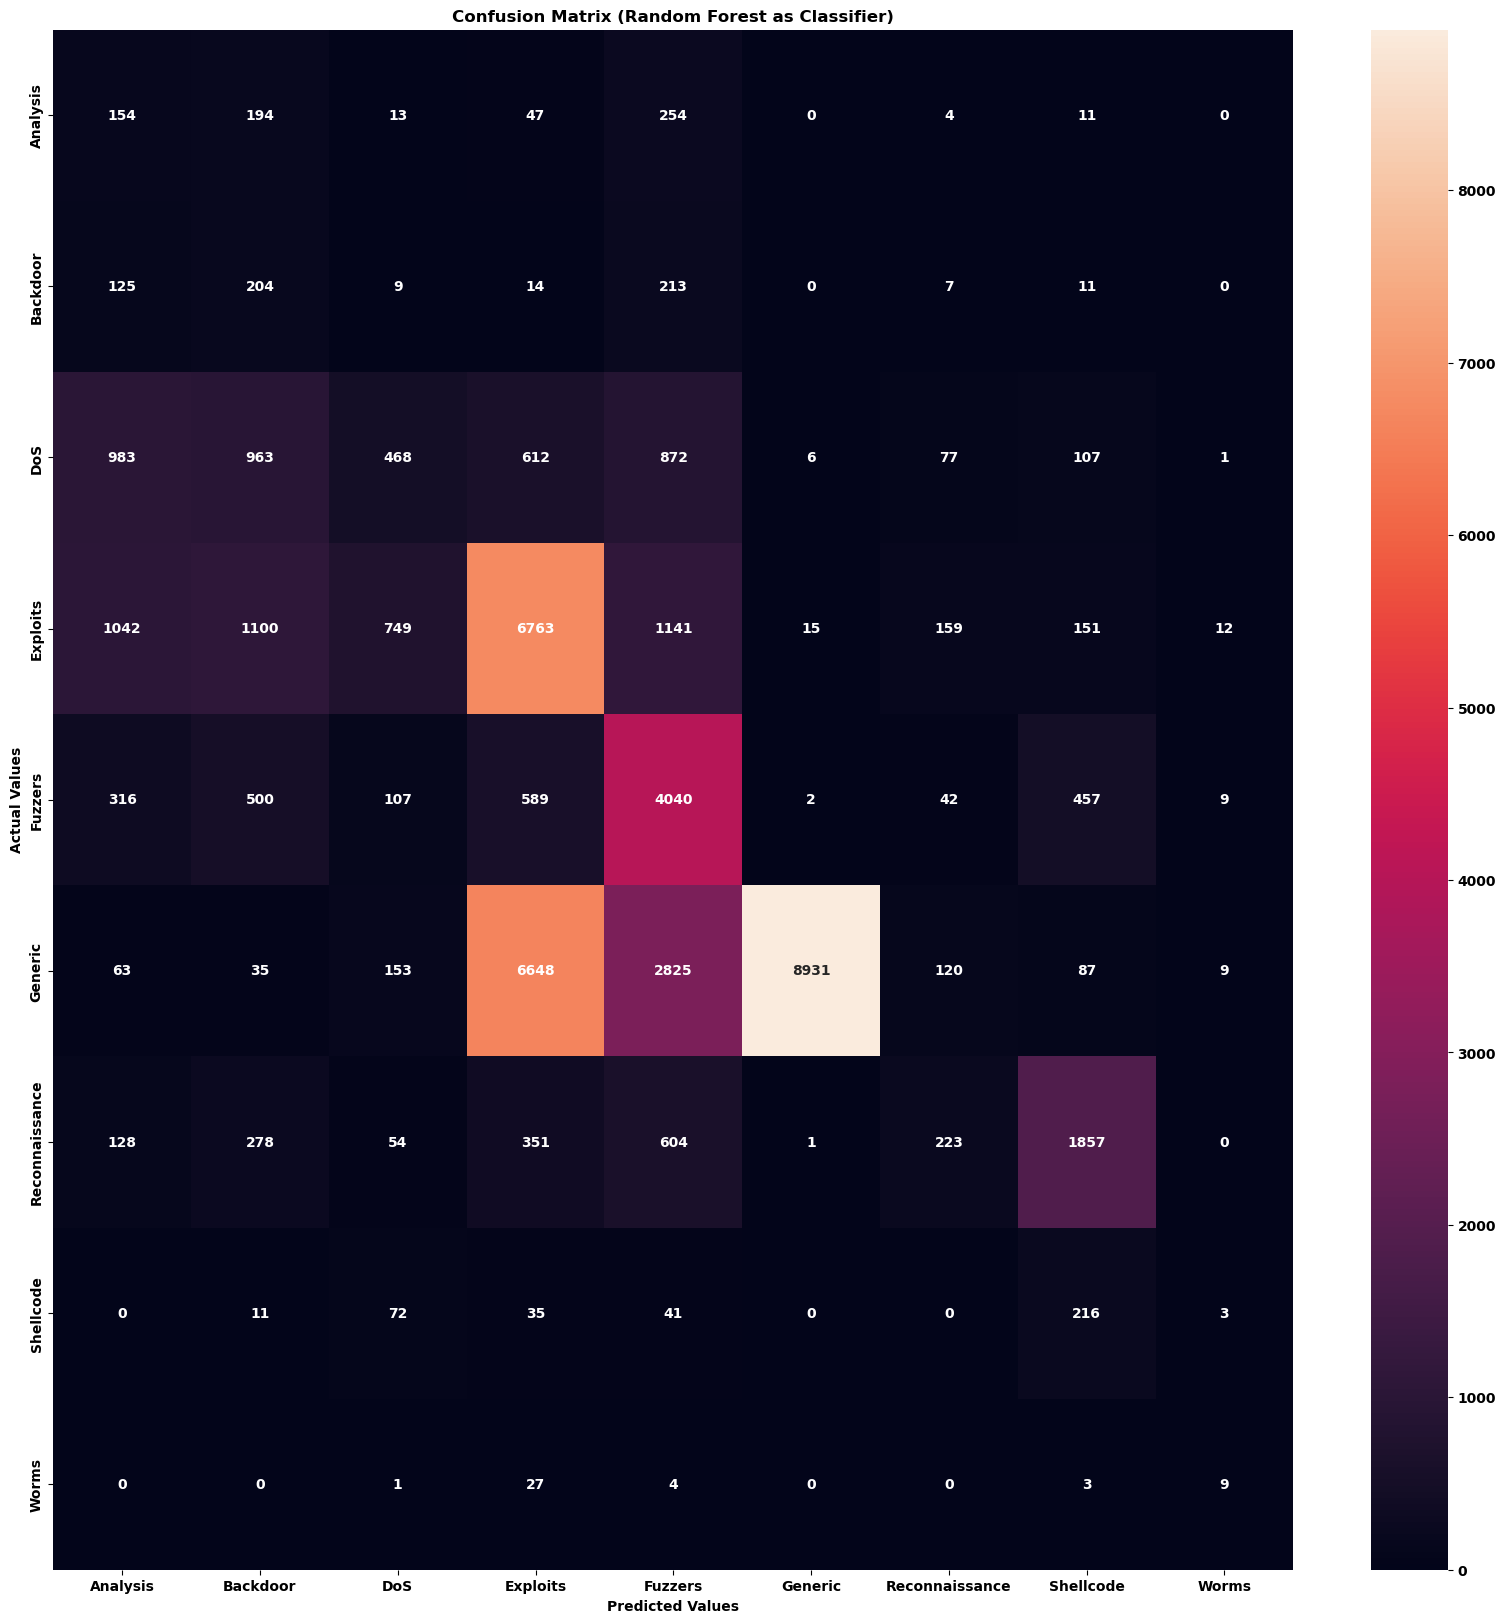

In [75]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Random Forest as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [76]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.2274741506646972
Backdoor: 0.34991423670668953
DoS: 0.1144534115920763
Exploits: 0.6075278476464248
Fuzzers: 0.6664467172550314
Generic: 0.4732658576652006
Reconnaissance: 0.06378718535469108
Shellcode: 0.5714285714285714
Worms: 0.20454545454545456


### Gradient Boosting

In [51]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_gbc)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

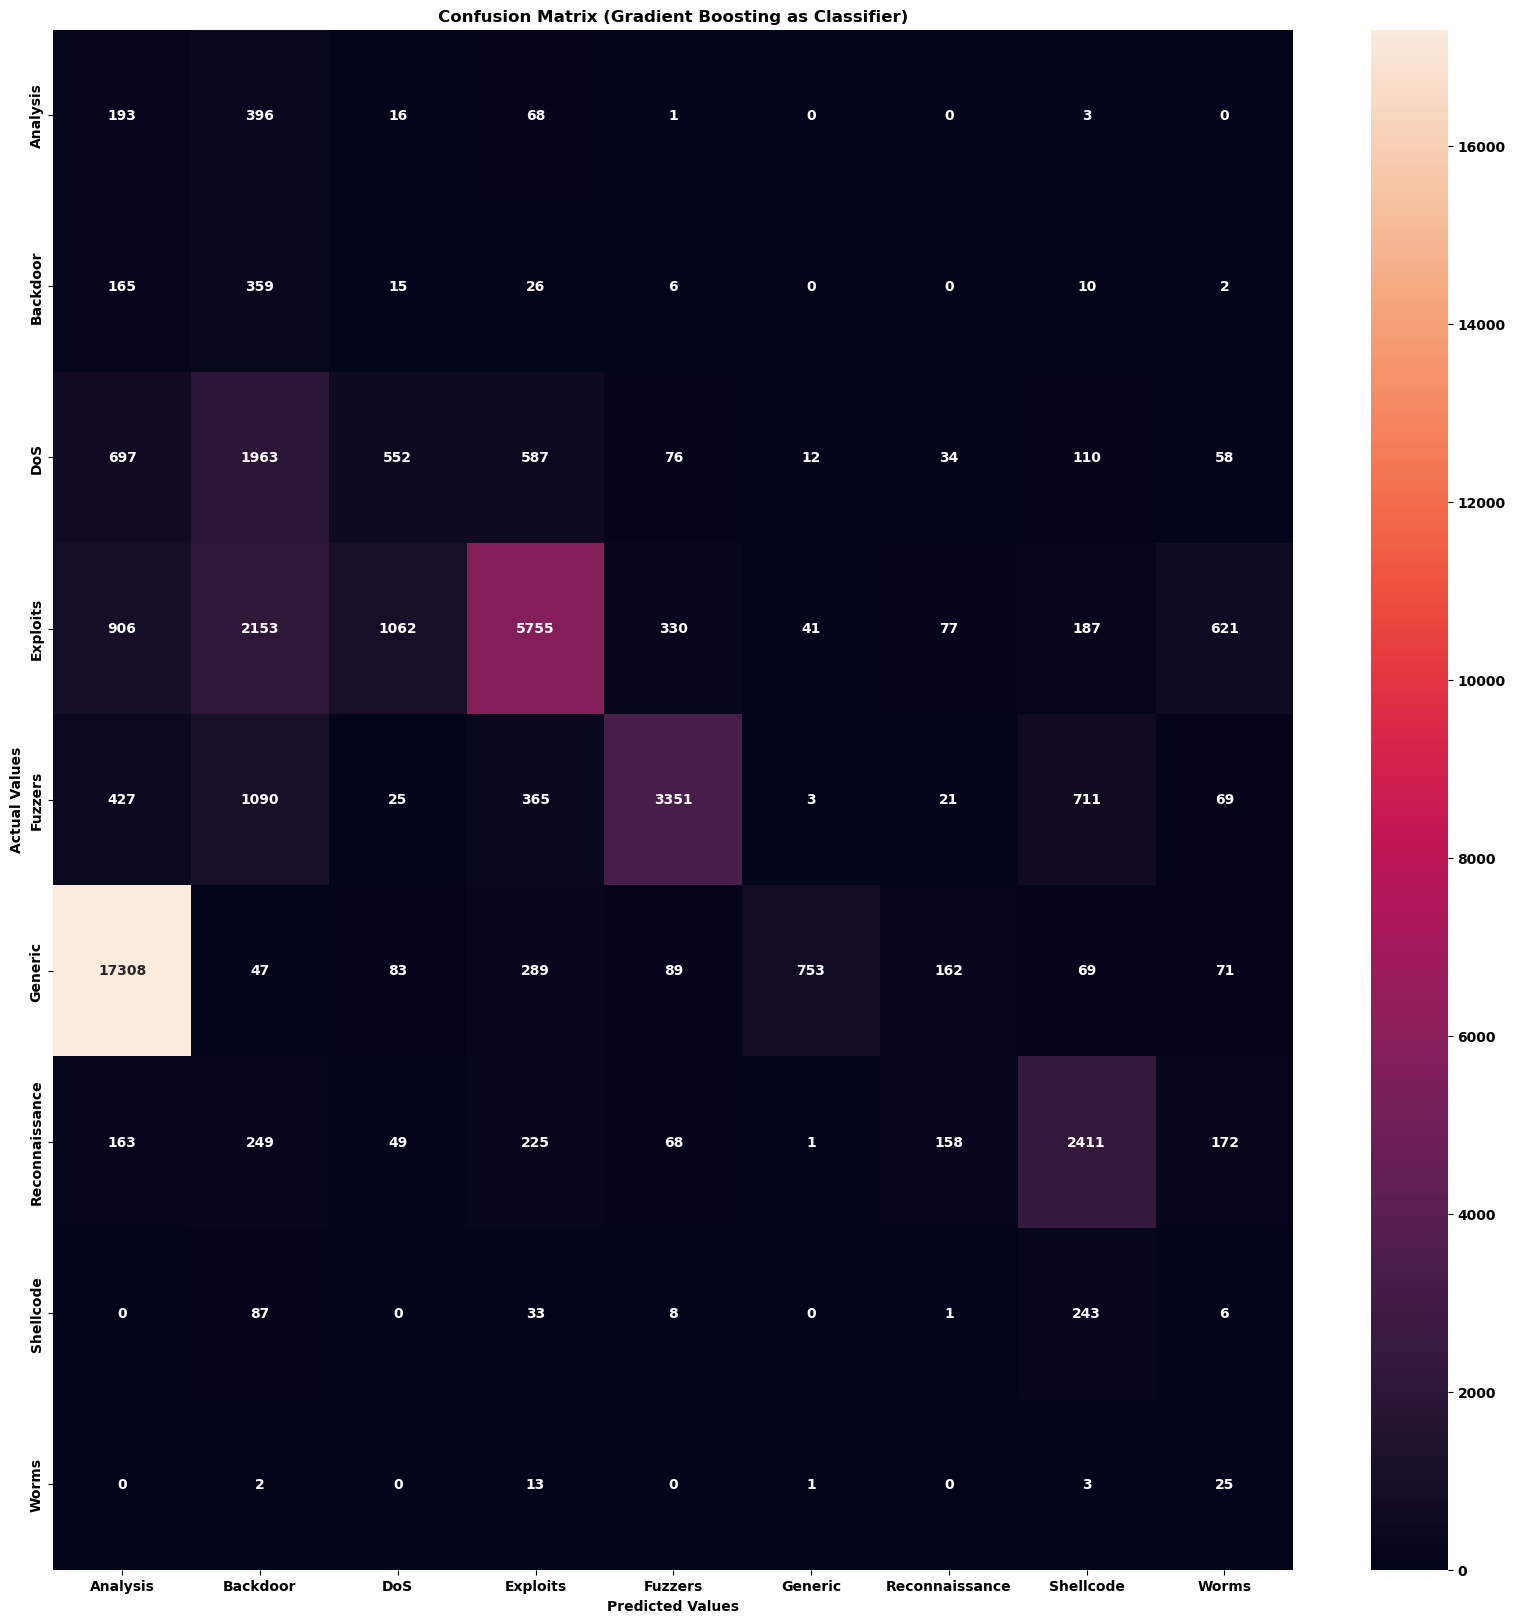

In [52]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Gradient Boosting as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [53]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.28508124076809455
Backdoor: 0.6157804459691252
DoS: 0.13499633162142333
Exploits: 0.5169780812073302
Fuzzers: 0.5527878587924777
Generic: 0.039902495893169417
Reconnaissance: 0.04519450800915332
Shellcode: 0.6428571428571429
Worms: 0.5681818181818182


### XGBoost

In [54]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_xgb)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

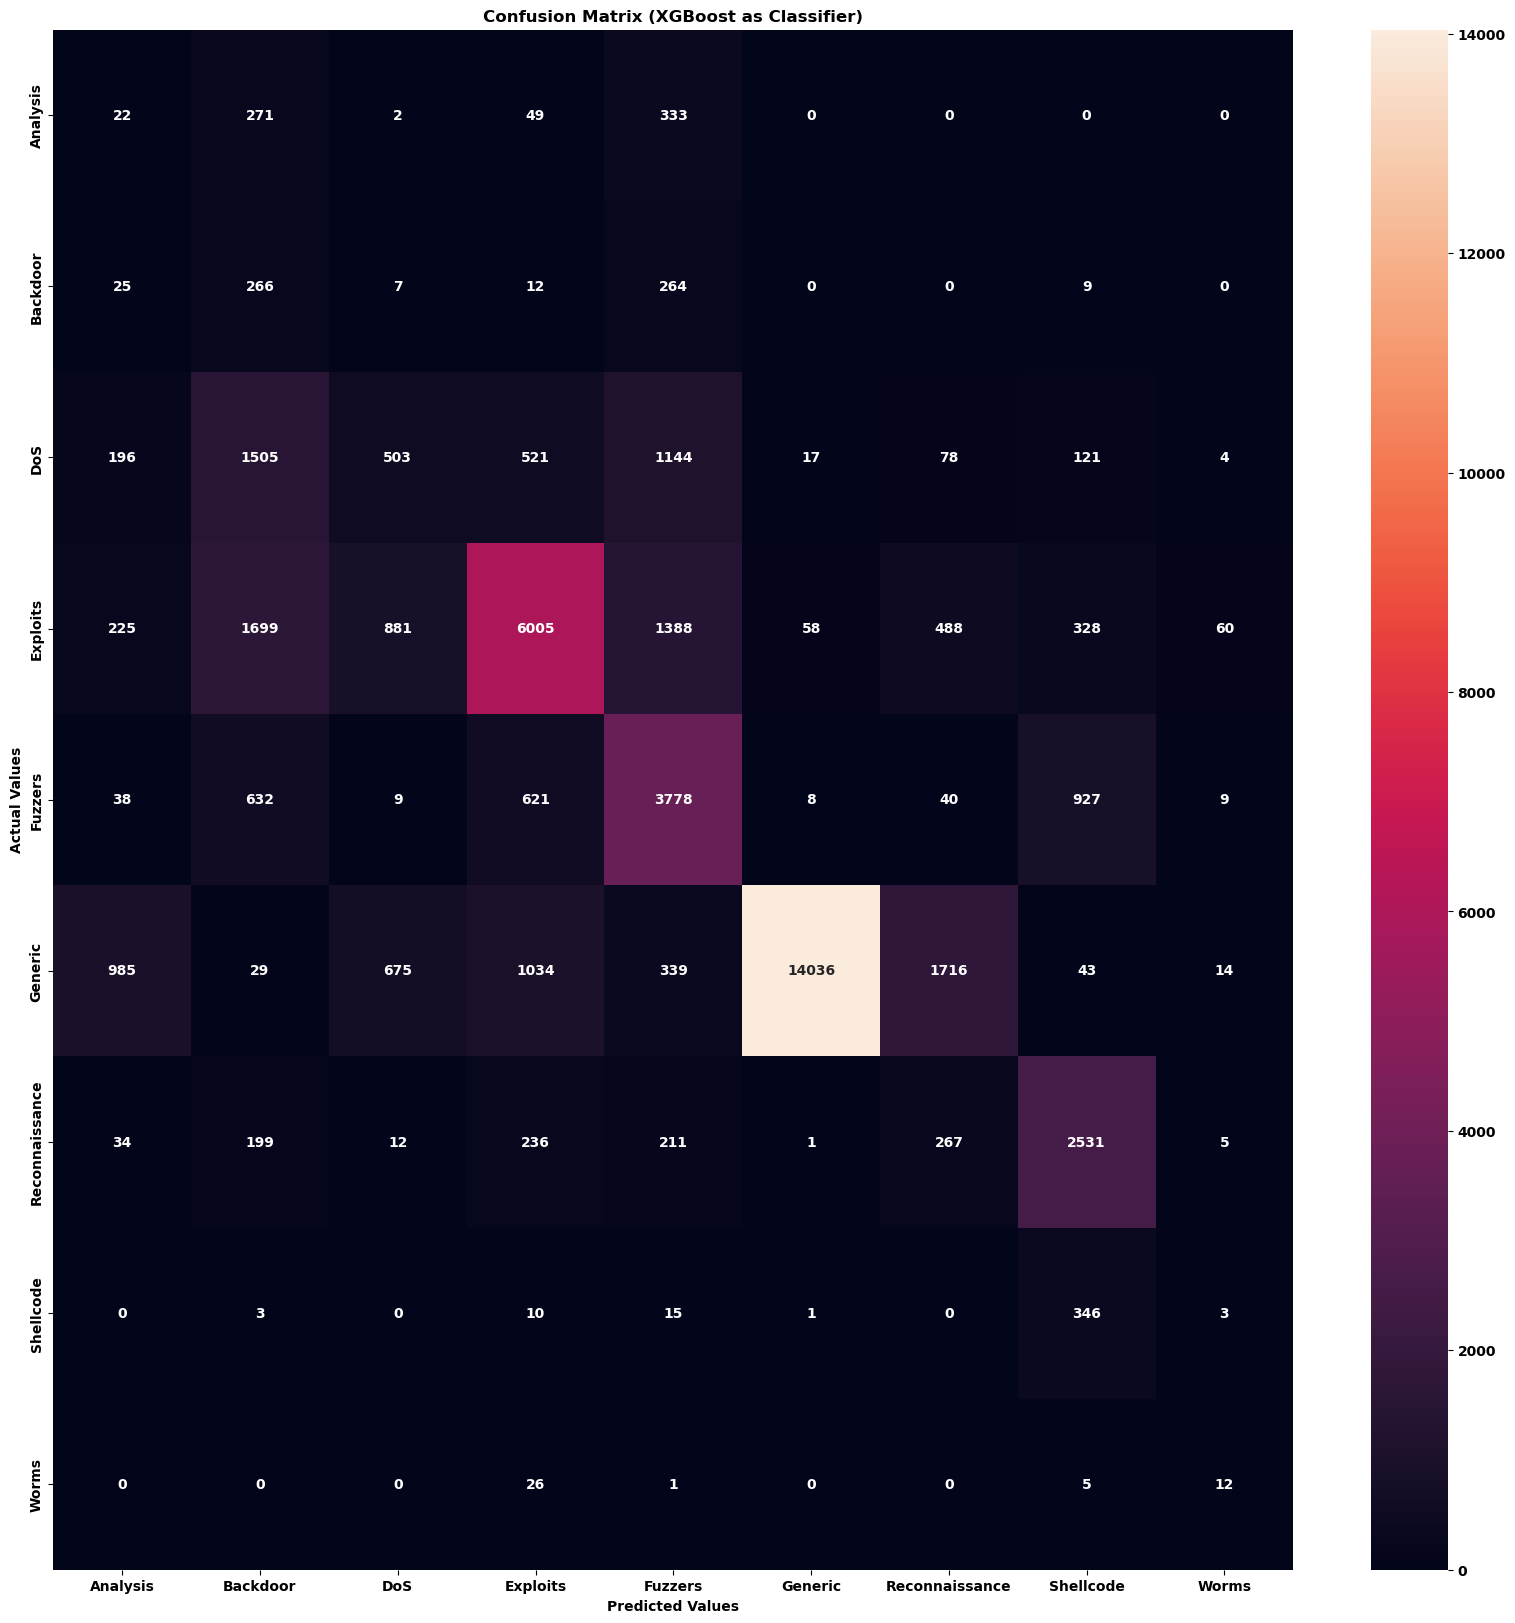

In [55]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (XGBoost as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [56]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.03249630723781388
Backdoor: 0.4562607204116638
DoS: 0.12301296160430424
Exploits: 0.5394358605821057
Fuzzers: 0.6232266578686902
Generic: 0.7437867627576705
Reconnaissance: 0.07637299771167048
Shellcode: 0.9153439153439153
Worms: 0.2727272727272727


## Save all model

In [57]:
import pickle

In [58]:
# save the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/destree.pkl', 'wb') as model_file:
    pickle.dump(destree, model_file)

# save the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/ranfor.pkl', 'wb') as model_file:
    pickle.dump(ranfor, model_file)

# save the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/gbc.pkl', 'wb') as model_file:
    pickle.dump(gbc, model_file)

# save the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/xgb.pkl', 'wb') as model_file:
    pickle.dump(xgb, model_file)

In [59]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/destree.pkl', 'rb') as model_file:
    destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/ranfor.pkl', 'rb') as model_file:
    ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/gbc.pkl', 'rb') as model_file:
    gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/xgb.pkl', 'rb') as model_file:
    xgb = pickle.load(model_file)

## Save all predicted

In [60]:
# save the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/p_test_destree.pkl', 'wb') as model_file:
    pickle.dump(p_test_destree, model_file)

# save the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/p_test_ranfor.pkl', 'wb') as model_file:
    pickle.dump(p_test_ranfor, model_file)

# save the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/p_test_gbc.pkl', 'wb') as model_file:
    pickle.dump(p_test_gbc, model_file)

# save the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/p_test_xgb.pkl', 'wb') as model_file:
    pickle.dump(p_test_xgb, model_file)

In [61]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/p_test_destree.pkl', 'rb') as model_file:
    p_test_destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/p_test_ranfor.pkl', 'rb') as model_file:
    p_test_ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/p_test_gbc.pkl', 'rb') as model_file:
    p_test_gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/BorderlineSMOTE/Saved/p_test_xgb.pkl', 'rb') as model_file:
    p_test_xgb = pickle.load(model_file)